
Author: Lourde Hajjar

This notebook explores the application of Naive Bayes classification on two datasets with binary and categorical features. It evaluates four Naive Bayes models—Gaussian, Multinomial, Complement, and Bernoulli—across multiple dataset variations.

The goal is to identify the most effective model and analyze the impact of data structure and preprocessing on classification accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Application for Dataset 1

In [3]:
# Load dataset paths
datasets = {
    "dataset1_og": "/content/gdrive/MyDrive/datasets/dataset1/1_og_b.csv",
    "dataset1_nrml": "/content/gdrive/MyDrive/datasets/dataset1/1_nrml_b.csv",
    "dataset1_ef": "/content/gdrive/MyDrive/datasets/dataset1/1_ef_b.csv",
}

# Initialize Results Storage
results = []

## Load, Train, and Evaluate the Dataset

In [4]:
# Processing each dataset
for name, path in datasets.items():
    print(f"Processing {name}...")

    # Load dataset
    data = pd.read_csv(path)

    # Split into features (X) and target (y)
    X = data.drop(columns='LUNG_CANCER')
    y = data['LUNG_CANCER']


    if y.ndim > 1:
        y = y.squeeze()

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "MultinomialNB": MultinomialNB(),
        "GaussianNB": GaussianNB(),
        "ComplementNB": ComplementNB(),
        "BernoulliNB": BernoulliNB(),
    }

    # Train and Evaluate Models
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model

        y_pred = model.predict(X_test)  # Make predictions

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() if confusion_matrix(y_test, y_pred).size == 4 else (None, None, None, None)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Append results
        results.append({
            "Dataset": name,
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "True Positive": tp,
            "False Positive": fp,
            "True Negative": tn,
            "False Negative": fn
        })

Processing dataset1_og...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing dataset1_nrml...
Processing dataset1_ef...


## Display Results

In [5]:
# Display Results
results_df = pd.DataFrame(results).drop_duplicates()
display(results_df)

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,True Positive,False Positive,True Negative,False Negative
0,dataset1_og,MultinomialNB,0.768519,0.771028,0.768519,0.769180,47,11,36,14
1,dataset1_og,GaussianNB,0.861111,0.861574,0.861111,0.861268,53,7,40,8
2,dataset1_og,ComplementNB,0.777778,0.777778,0.777778,0.777778,49,12,35,12
3,dataset1_og,BernoulliNB,0.435185,0.189386,0.435185,0.263919,0,0,47,61
4,dataset1_nrml,MultinomialNB,0.712963,0.715702,0.712963,0.713784,44,14,33,17
5,dataset1_nrml,GaussianNB,0.861111,0.861574,0.861111,0.861268,53,7,40,8
6,dataset1_nrml,ComplementNB,0.712963,0.713735,0.712963,0.713288,45,15,32,16
7,dataset1_nrml,BernoulliNB,0.851852,0.853056,0.851852,0.852160,52,7,40,9
8,dataset1_ef,MultinomialNB,0.574074,0.590139,0.574074,0.574951,32,17,30,29
9,dataset1_ef,GaussianNB,0.824074,0.836895,0.824074,0.824754,47,5,42,14


## Plot Confusion Matrix and Model Comparison


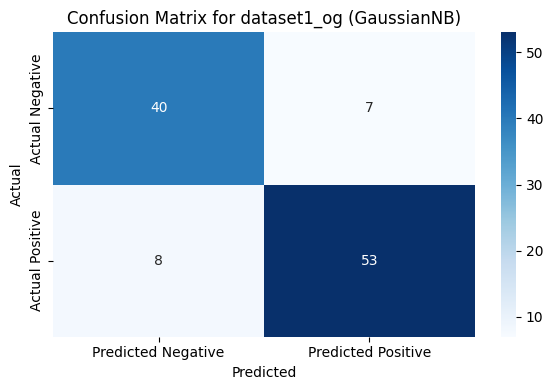

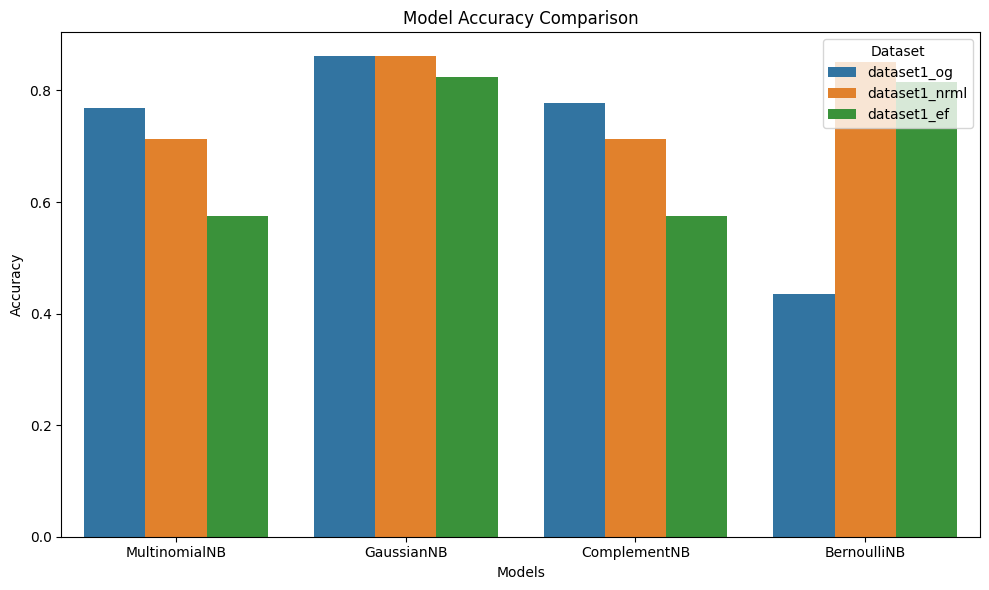

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for the best result: dataset1_og GaussianNB
def plot_specific_confusion_matrix():
    # Filter for dataset1_og and GaussianNB
    result = next((res for res in results if res["Dataset"] == "dataset1_og" and res["Model"] == "GaussianNB"), None)
    if not result:
        raise ValueError("No results found for dataset1_og with GaussianNB")

    # Extract confusion matrix details
    conf_matrix = [[result["True Negative"], result["False Positive"]],
                   [result["False Negative"], result["True Positive"]]]

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f'Confusion Matrix for dataset1_og (GaussianNB)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot a graph comparing all models in terms of accuracy
def plot_accuracy_comparison():
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot accuracy for all models across datasets
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Dataset")
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.legend(title='Dataset', loc='upper right')
    plt.tight_layout()
    plt.show()

# Call the functions
plot_specific_confusion_matrix()
plot_accuracy_comparison()


## Application for Dataset 2

In [14]:
# Load dataset path

datasets = {
    "dataset2_og": "/content/gdrive/MyDrive/datasets/dataset2/2_og.csv",

    }

# Initialize Results Storage
results = []

## Load, Train, and Evaluate the Dataset

In [15]:
# Processing each dataset
for name, path in datasets.items():
    print(f"Processing {name}...")

    # Load dataset
    data = pd.read_csv(path)

    # Split into features (X) and target (y)
    X = data.drop(columns='Level')
    y = data['Level']

    # Ensure y is a 1D array (if needed)
    if y.ndim > 1:
        y = y.squeeze()

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "MultinomialNB": MultinomialNB(),
        "GaussianNB": GaussianNB(),
        "ComplementNB": ComplementNB(),
        "BernoulliNB": BernoulliNB(),
    }

    # Train and Evaluate Models
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model

        y_pred = model.predict(X_test)  # Make predictions

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Append results
        results.append({
            "Dataset": name,
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": conf_matrix.tolist(),  # Save confusion matrix as a list
            "y_test": y_test.tolist(),  # Store true labels
            "y_pred": y_pred.tolist(),  # Store predicted labels
        })



Processing dataset2_og...


## Plot Confusion Matrix and Model Comparison

,Dataset,Model,Accuracy,Precision,Recall,F1 Score
0,dataset2_og,MultinomialNB,0.795,0.789309,0.795,0.789366
1,dataset2_og,GaussianNB,0.895,0.900208,0.895,0.895002
2,dataset2_og,ComplementNB,0.825,0.823538,0.825,0.819569
3,dataset2_og,BernoulliNB,0.410,0.168100,0.410,0.238440


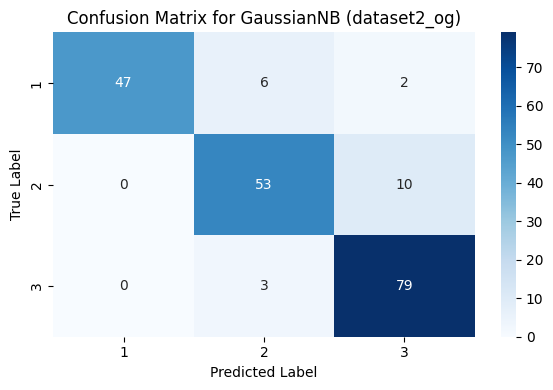

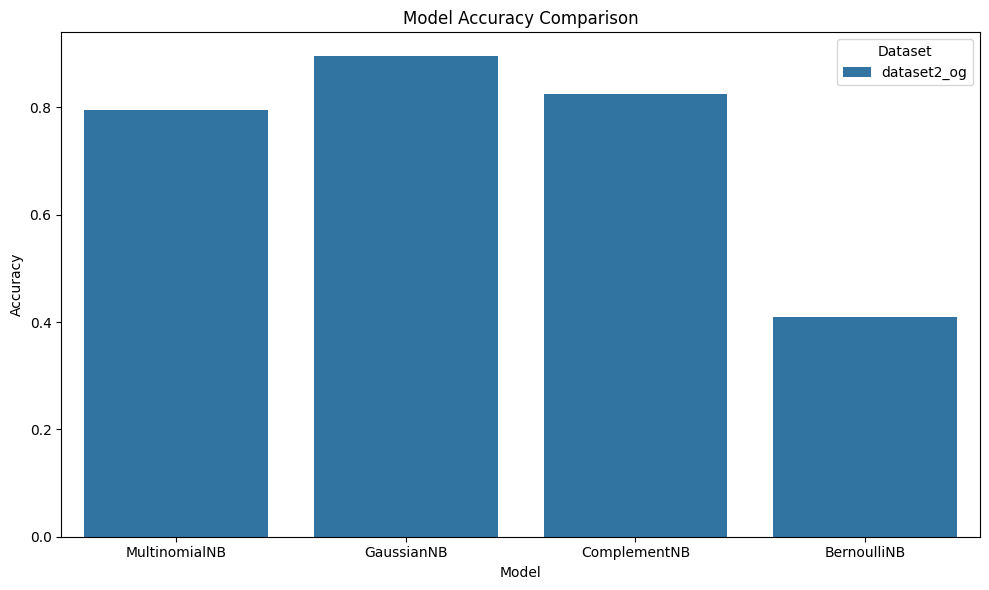

In [16]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Remove duplicates based on 'Dataset' and 'Model'
results_df = results_df.drop_duplicates(subset=["Dataset", "Model"])

# Drop unnecessary columns for display
results_df_display = results_df.drop(columns=["Confusion Matrix", "y_test", "y_pred"])

# Display the cleaned DataFrame
display(results_df_display)

# Function to plot confusion matrix with true and predicted labels
def plot_confusion_matrix_with_labels(conf_matrix, class_names, model_name, dataset_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name} ({dataset_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Function to plot model comparison based on accuracy
def plot_model_accuracy_comparison(results_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Dataset", dodge=True)
    plt.title("Model Accuracy Comparison")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.legend(title="Dataset", loc="upper right")
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for the dataset and model
dataset_name = "dataset2_og"
model_name = "GaussianNB"
result = next((res for res in results if res["Dataset"] == dataset_name and res["Model"] == model_name), None)

if result:
    conf_matrix = np.array(result["Confusion Matrix"])  # Convert back to numpy array
    class_names = sorted(set(result["y_test"]))  # Use unique class names from y_test
    plot_confusion_matrix_with_labels(conf_matrix, class_names, model_name, dataset_name)
else:
    print(f"No results found for {dataset_name} with {model_name}")

# Plot model accuracy comparison
plot_model_accuracy_comparison(results_df)

The results demonstrate that for Dataset 1 and Dataset 2, Gaussian Naive Bayes achieved the best accuracy, with 86% for Dataset 1 and 89% for Dataset 2. Given that Dataset 1 is binary and Dataset 2 is categorical, Gaussian Naive Bayes performed better than the other models due to its ability to approximate discrete features as continuous.

In contrast, the other models are optimized for specific data types: Multinomial Naive Bayes is best suited for count data like word frequencies, Complement Naive Bayes is designed for imbalanced count data, and Bernoulli Naive Bayes excels with strictly binary data.